# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

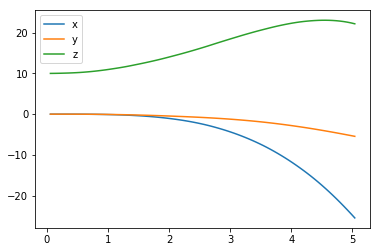

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

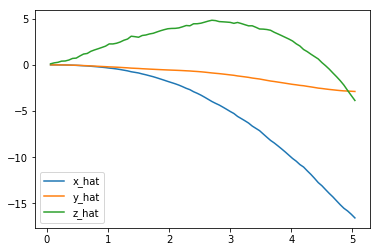

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

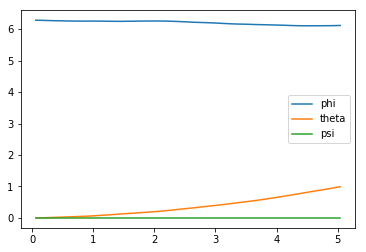

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

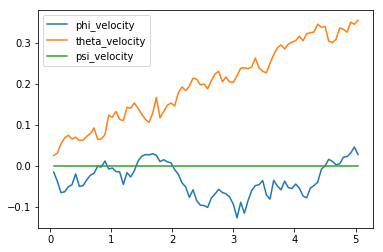

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

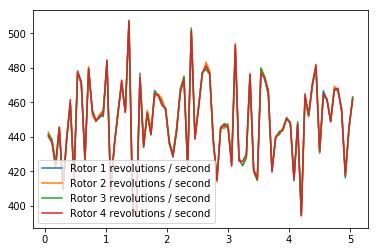

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-25.46868693  -5.44109722  22.18024038   6.11627316   0.99088518   0.        ]
[-16.56006161  -2.87759296  -3.8508182 ]
[ 0.0273709   0.35422302  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [110]:
%load_ext autoreload
%autoreload 2

import keras
import sys
import numpy as np
import pandas as pd
from agents.ddpg import DDPG
from task import Task

num_episodes = 500
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 10.])             # target position
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
# task = Task(target_pos=target_pos)

agent = DDPG(task)
# agent = PolicySearch_Agent(task)

all_scores = []
all_rewards = []

# Saving data
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results = []
results = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action) # ORIGINAL
        #next_state, reward, done = agent.task.step(action)
        
        agent.step(action, reward, next_state, done)
        state = next_state
        
        # Saving data from one episode
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
                
        if done:
            all_scores.append(agent.score)
            all_rewards.append(agent.total_reward)
            
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), total_rewards = {:7.3f}".format(
                i_episode, agent.score, agent.best_score, agent.total_reward), end="")  # [debug]
            print(task.sim.pose[:3]) # position at end of episodes
            
            # Saving ALL the data from one episode
            all_results.append(results)
            results = {x : [] for x in labels}
            break
    
    sys.stdout.flush()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =    1, score =    -inf (best =    -inf), total_rewards = -77.212[-7.16747585 -0.11508627  0.        ]
Episode =    2, score =    -inf (best =    -inf), total_rewards = -71.341[-0.48748353  0.82677972  0.        ]
Episode =    3, score =  -2.848 (best =  -2.719), total_rewards = -68.352[-1.86050612  0.10340591  0.        ]
Episode =    4, score =  -2.686 (best =   0.468), total_rewards = -56.412[-0.63933299 -0.9647289   0.        ]
Episode =    5, score =  -2.532 (best =   1.175), total_rewards = -53.172[-2.75960031  2.24212411  0.        ]
Episode =    6, score =  -2.661 (best =   1.291), total_rewards = -79.826[ 1.79549477 -5.07377029  0.        ]
Episode =    7, score =  -2.661 (best =   1.291), total_rewards = -77.175[ -1.20559628 -10.83522797   0.        ]
Episode =    8, score =  -2.719 (best =   1.291), total_rewards = -70.702[-1.24763603 -0.34619504  0.        ]
Episode =    9, score

Episode =   74, score =  -1.940 (best =   2.908), total_rewards = -56.262[ 7.42685655  0.72890638  0.        ]
Episode =   75, score =  -2.094 (best =   2.908), total_rewards = -64.923[ 7.24363812  5.58067349  0.        ]
Episode =   76, score =  -1.956 (best =   2.908), total_rewards = -113.439[ 3.43792449 -8.60610541  0.        ]
Episode =   77, score =  -1.832 (best =   2.908), total_rewards = -43.972[ 1.30487719 -1.38233698  0.        ]
Episode =   78, score =  -1.332 (best =   2.908), total_rewards = -43.958[ -0.19391968 -12.24751619   0.        ]
Episode =   79, score =  -1.803 (best =   2.908), total_rewards = -52.274[-1.85186083 -8.30489533  0.        ]
Episode =   80, score =  -1.935 (best =   2.908), total_rewards = -75.454[-3.802175    3.13633943  0.        ]
Episode =   81, score =  -1.746 (best =   2.908), total_rewards = -50.627[-11.17633818  -4.41209196   0.        ]
Episode =   82, score =  -1.775 (best =   2.908), total_rewards = -46.145[-5.34378529  8.12957521  0.    

Episode =  148, score =  -1.199 (best =   2.976), total_rewards = -45.557[-1.89206497 -0.31796762  0.        ]
Episode =  149, score =  -1.334 (best =   2.976), total_rewards = -46.693[-5.47835238 -0.36812194  0.        ]
Episode =  150, score =  -1.514 (best =   2.976), total_rewards = -49.969[-6.80148452 -0.26320053  0.        ]
Episode =  151, score =  -1.331 (best =   2.976), total_rewards = -46.595[-5.03670671 -0.03895295  0.        ]
Episode =  152, score =  -1.785 (best =   2.976), total_rewards = -58.890[-6.68964508 -0.59790836  0.        ]
Episode =  153, score =  -1.376 (best =   2.976), total_rewards = -46.768[-6.08411013 -0.20611919  0.        ]
Episode =  154, score =  -0.982 (best =   2.976), total_rewards = -39.272[ 4.30664082  0.3171276   0.        ]
Episode =  155, score =  -2.326 (best =   2.976), total_rewards = -55.830[-5.0086187   0.28684985  0.        ]
Episode =  156, score =  -2.331 (best =   2.976), total_rewards = -55.941[ 2.94163433  0.10994838  0.        ]
E

Episode =  220, score =   2.997 (best =   2.997), total_rewards = 251.778[  26.03562688   23.30282365  154.88748169]
Episode =  221, score =   2.997 (best =   2.997), total_rewards = 251.777[ -15.66674602   21.7947952   141.67727552]
Episode =  222, score =   2.997 (best =   2.997), total_rewards = 251.777[  20.15337988   11.43322236  146.05503133]
Episode =  223, score =   2.997 (best =   2.997), total_rewards = 251.778[  -9.64797325  -24.98104182  134.39992145]
Episode =  224, score =   2.997 (best =   2.997), total_rewards = 251.777[ -22.98592123   22.48114275  134.08865875]
Episode =  225, score =   2.997 (best =   2.997), total_rewards = 251.779[  30.88744536   20.81743205  136.72553941]
Episode =  226, score =   2.997 (best =   2.997), total_rewards = 251.777[  36.4690986    44.40695154  181.70337027]
Episode =  227, score =   2.997 (best =   2.997), total_rewards = 251.778[  11.38986881  -10.53691782  147.31973424]
Episode =  228, score =   2.997 (best =   2.997), total_rewards 

Episode =  290, score =   2.997 (best =   2.997), total_rewards = 251.778[ -58.76659075  -12.27984899  123.7813733 ]
Episode =  291, score =   2.997 (best =   2.997), total_rewards = 251.776[  17.48057532  -28.045577    133.23367404]
Episode =  292, score =   2.997 (best =   2.997), total_rewards = 251.777[   0.92513167  -65.91305088  180.00594541]
Episode =  293, score =   2.997 (best =   2.997), total_rewards = 251.777[ -37.70091213   -9.34208996  130.09758366]
Episode =  294, score =   2.997 (best =   2.997), total_rewards = 251.776[  -1.51939063   -8.92587732  139.34714994]
Episode =  295, score =   2.997 (best =   2.997), total_rewards = 251.778[   2.1009064   -14.2580137   137.63031388]
Episode =  296, score =   2.997 (best =   2.997), total_rewards = 251.778[  10.84008582   26.42301515  137.85209324]
Episode =  297, score =   2.997 (best =   2.997), total_rewards = 251.776[  11.91169969  -36.4336289   130.31107976]
Episode =  298, score =   2.997 (best =   2.997), total_rewards 

Episode =  360, score =   2.997 (best =   2.997), total_rewards = 251.778[ -11.43717024   -8.51430445  137.45637419]
Episode =  361, score =   2.654 (best =   2.997), total_rewards = 222.896[  22.56858601  -62.03153562  112.63292229]
Episode =  362, score =   2.997 (best =   2.997), total_rewards = 251.778[   3.01760927   20.44338534  138.44290813]
Episode =  363, score =   2.997 (best =   2.997), total_rewards = 251.776[  -4.99295247   16.52851479  138.33304591]
Episode =  364, score =   2.997 (best =   2.997), total_rewards = 251.776[  -8.17503393   26.49964404  135.30473552]
Episode =  365, score =   2.997 (best =   2.997), total_rewards = 251.778[ -34.54309029    4.76934335  134.02090184]
Episode =  366, score =   2.997 (best =   2.997), total_rewards = 251.778[ -52.77174599   -9.17497964  120.43045306]
Episode =  367, score =   2.997 (best =   2.997), total_rewards = 251.778[ -14.75447732   -6.17840095  138.54478526]
Episode =  368, score =   2.997 (best =   2.997), total_rewards 

Episode =  431, score =   2.997 (best =   2.997), total_rewards = 251.777[ -25.95434178  -15.58163935  132.90999616]
Episode =  432, score =   2.997 (best =   2.997), total_rewards = 251.777[  22.97700012   24.72358935  145.98641118]
Episode =  433, score =   2.997 (best =   2.997), total_rewards = 251.776[  -3.91883279  -15.93810847  137.14618209]
Episode =  434, score =   2.997 (best =   2.997), total_rewards = 251.778[ -26.74361227  -46.43089238  125.44545773]
Episode =  435, score =   2.997 (best =   2.997), total_rewards = 251.779[ -46.47444425  -18.87846428  122.12340514]
Episode =  436, score =   2.765 (best =   2.997), total_rewards = 232.262[ -69.11963911   -4.16967598  105.06007015]
Episode =  437, score =   2.997 (best =   2.997), total_rewards = 251.778[  12.52366083    9.4135242   137.67754996]
Episode =  438, score =   2.997 (best =   2.997), total_rewards = 251.775[ -31.24370612  -31.11542354  128.1729257 ]
Episode =  439, score =   2.997 (best =   2.997), total_rewards 

## Plot the Quad Simulation


In [111]:
visualize_episode = all_results[436] # what episode to visualize. change the index to loop through episodes

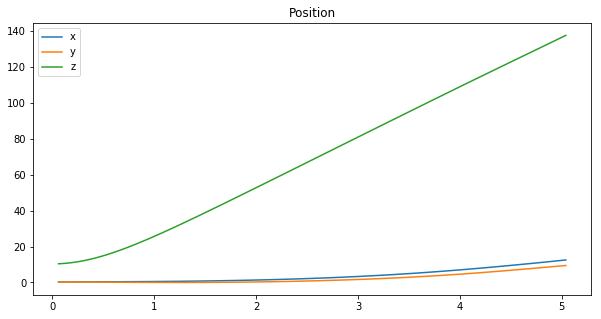

In [112]:
# Position
plt.plot(visualize_episode['time'], visualize_episode['x'], label='x')
plt.plot(visualize_episode['time'], visualize_episode['y'], label='y')
plt.plot(visualize_episode['time'], visualize_episode['z'], label='z')
plt.title('Position')
plt.legend()
_ = plt.ylim()

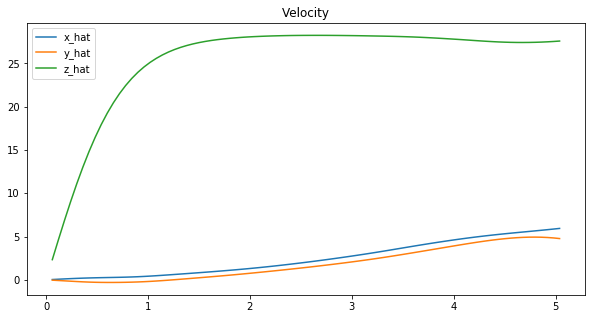

In [113]:
# Velocity
plt.plot(visualize_episode['time'], visualize_episode['x_velocity'], label='x_hat')
plt.plot(visualize_episode['time'], visualize_episode['y_velocity'], label='y_hat')
plt.plot(visualize_episode['time'], visualize_episode['z_velocity'], label='z_hat')
plt.title('Velocity')
plt.legend()
_ = plt.ylim()

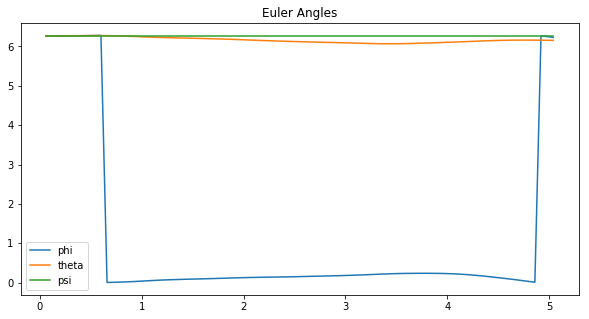

In [114]:
# Euler Angles
plt.plot(visualize_episode['time'], visualize_episode['phi'], label='phi')
plt.plot(visualize_episode['time'], visualize_episode['theta'], label='theta')
plt.plot(visualize_episode['time'], visualize_episode['psi'], label='psi')
plt.title('Euler Angles')
plt.legend()
_ = plt.ylim()

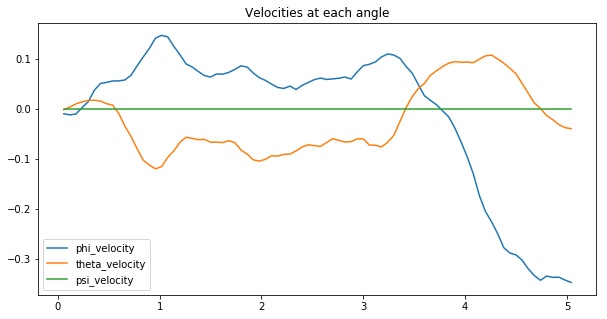

In [115]:
# Velocities in radians per second of each euler angle
plt.plot(visualize_episode['time'], visualize_episode['phi_velocity'], label='phi_velocity')
plt.plot(visualize_episode['time'], visualize_episode['theta_velocity'], label='theta_velocity')
plt.plot(visualize_episode['time'], visualize_episode['psi_velocity'], label='psi_velocity')
plt.title('Velocities at each angle')
plt.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [138]:
# Moving average to smoothen out rewards and scores
# From this stack overflow: https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
N = 6
moving_avg_score = []
moving_avg_rewards = []

# moving average for scores
cumsum = [0]
for i, x in enumerate(all_scores[3:], 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_temp = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_avg_score.append(moving_temp)
        
# moving average for rewards
cumsum = [0]
for i, x in enumerate(all_rewards[3:], 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_temp = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_avg_rewards.append(moving_temp)

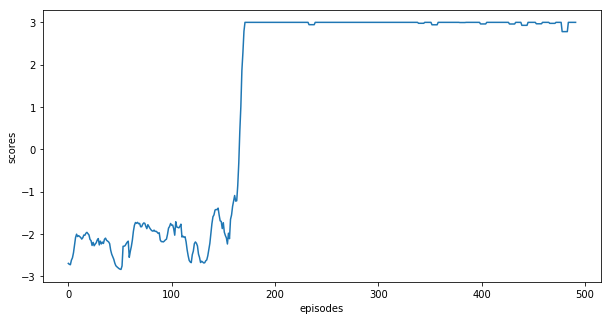

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

plt.plot(moving_avg_score)
plt.xlabel('episodes')
plt.ylabel('scores')
plt.show()

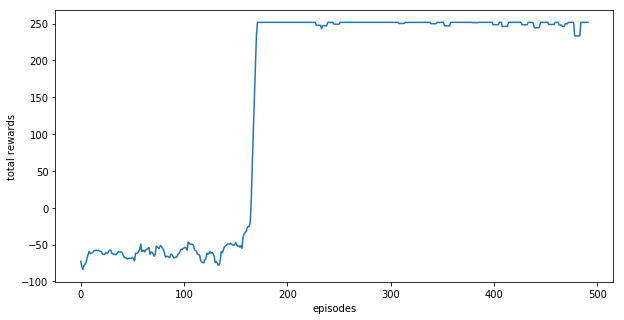

In [140]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

plt.plot(moving_avg_rewards)
plt.xlabel('episodes')
plt.ylabel('total rewards')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I think task definement was the hardest part of the excersize. I tried dozens of differnt functions at first that all produced tiny tiny improvements that practically felt random from each time I ran the algorithm. I finally had to go to the Slack channel and read up on what folks suggetsed. I found some code I tried out to see the effect. It did three things: 1. added a penalty when there was a very large difference in the euler anges of rotation of the target and simulated positions (with the idea that the angles should be similar for a good solution), 2. added a reward for the quadrocopter staying close to the target z axis, and 3. related to #2 added a penalty for moving too much on the x and y axes. This had a good effect on the rewards and scores. It certainly changes my plot, but it was converging way too quickly to a stable solution and never changing.

Then I read that someone had tried randomizing the initial position of the quad on each episode run and that felt like a good idea. In the reset() method of the Task class I added just a bit of noise to the initial position of the quad. 

After the initial review, I tried a few new things: first, I took the advice to somehow reward vertical velocity on the z-axis to make the quad fly. This was straigtforward as I justa added the suggested `self.sim.v[2]` to the reward. Second, I also took the advice to clip the reward between -1 and 1 to help the neural net better learn the gradient parameters without high magnitude deviations. At first, the negative penalties I was using were way too large and they were producing starnge results (look at function `get_rewards_new()` in Tasks). When I scaled down those negative penalties by using my original function I started getting good results. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the Deep Deterministic Policy Gradients, which is an actor-critic method as suggested by the instructions to the project. In fact, I relied heavily on the instruction code, which included a sample of an actor, critic, and DDPG to get started. The reward and score values were similar to what we saw for the policy search approach.

As suggested in the slack channel, I took a look at the original paper for DDPG (https://arxiv.org/pdf/1509.02971.pdf) and in section 7. the experimental details were revealed. The discount factor $\gamma$ was set to 0.99, the soft target updates $\tau$ to 0.001. For the Ornstein-Uhlenbeck noise parameters the paper uses: $\theta$ = 0.15 and σ = 0.2. So I essentially left those parameters the same as in the paper.

I tried a few different architectures for the networks. First I tried adding batch normalization and dropout as suggested in the forum. That worked pretty well, but I was curious to try other approaches. In the DDPG paper the authors use layers with 300-400 neurons as well as what another author tries in this blog post shared on the slack channel: http://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html. Therefore I tried creating one architecture where the layers were in the hundredds. This ran much more slowly and didn't seem to create huge improvements so I stuck to my first approach in temrs of the layers. 

After initial review I also added a seed within the noise class as my reviewer suggested in order to produce more reproducible results.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task was relatively difficult to learn given that small small changes in the task resulted in huge changes in the learning algorithm. What's more, I only started seeing results after about ~260 episodes when the agent finally started showing more positive rewards. That was certainly where the network had an aha! moment.

Towards the final episodes the agent definitely stabilized, showed less improvement, and started giving repeatable results.

I also took the reviewer's advice and started plotting the position, velocity, and angles of the quad on each episode. It graetly helped visualize what was going on and slightly tweak my options.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

This was by far the most challenging project in the whole nanodegree. The section on reinforcement learning was hard and at times I was confused by that varying approaches amongst all the different algorithms. The differences felt subtle if you didn't watch the material over and over again. 

Getting started and simply outputting a result for my agent wasn't terribly hard because we were provided with a lot of starter code. The difficult part was really knowing *what* to tune. I spent a lot of time trying out different hyperparameters, then moved to trying out various reward functions, before realizing I could also tweak the layers of the actor and critic networks by reading over the Slack. It's really a combination of all those things that moved the needle a bit. 

In retrospect, given the hardest part was specifying the task correctly, I realize how important this one bit is in shaping correct results for my neural net. 

After my first submission, my reviewer's comments were really key to helping me solve the project.